In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
from wordcloud import WordCloud
import itertools as it

In [4]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
content_type = df['type'].value_counts()  
content_type

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0, 0.5, 'Count')

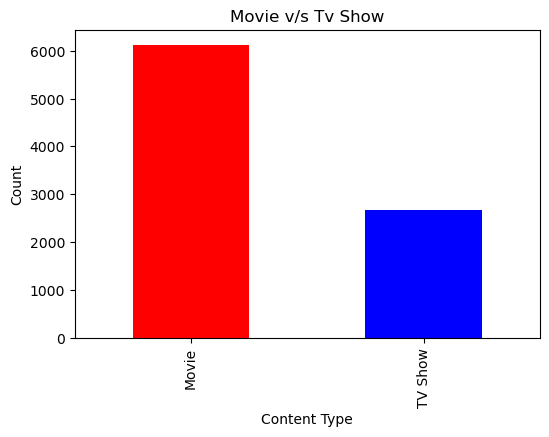

In [15]:
plt.figure(figsize = (6,4))
content_type.plot(kind = 'bar',color = ['red','blue'])
plt.title('Movie v/s Tv Show')
plt.xlabel('Content Type')
plt.ylabel('Count')

In [16]:
country_distribution = df['country'].value_counts().head(10)  
country_distribution

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

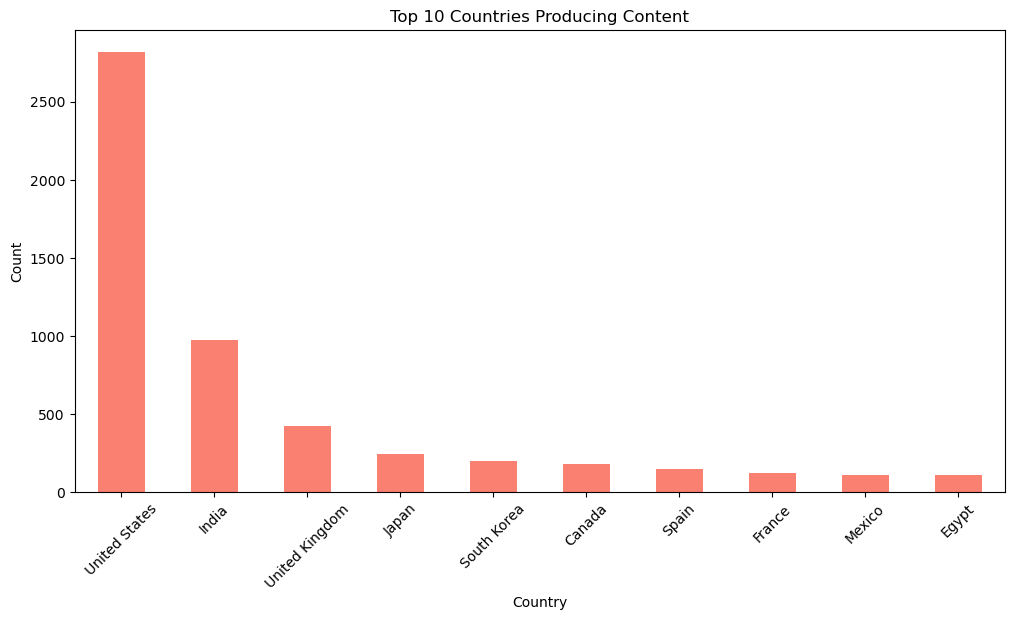

In [17]:
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
df.drop(["show_id","director","cast","country","date_added","release_year","rating","duration"],axis=1,inplace=True)
df.head(5)

,type,title,listed_in,description
0,Movie,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [24]:
genre = df['listed_in'].tolist()

In [27]:
cloud = WordCloud(background_color = 'white',colormap='Reds',max_words = 120).generate(''.join(list(it.chain(*genre))))

In [30]:
cloud2 = WordCloud(background_color='white',colormap='Reds',max_words=150).generate(''.join(df['title'].tolist()))

Text(-1, -10, "Most common words used in movies/TV shows' titles")

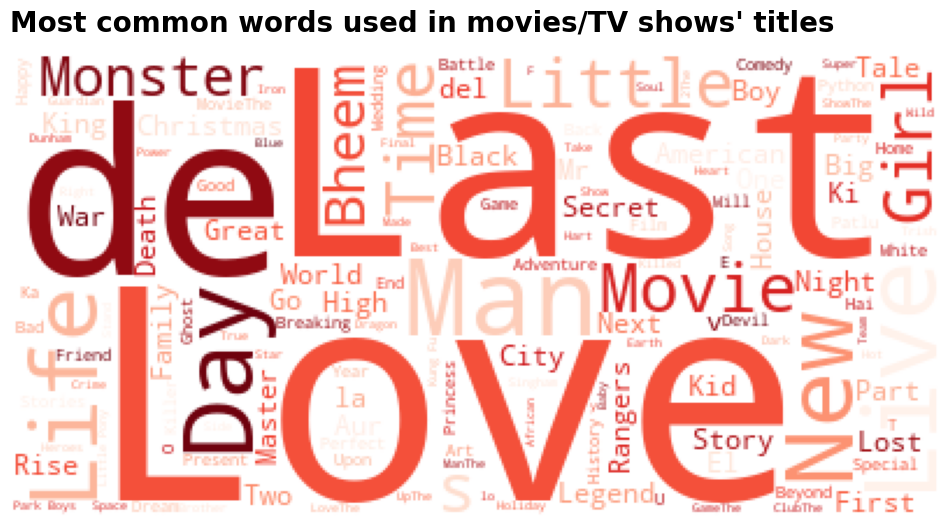

In [31]:
plt.figure(figsize=(12,12))
plt.imshow(cloud2)
plt.axis('off')
plt.text(-1,-10,"Most common words used in movies/TV shows' titles", family='sans-serif', fontsize=20, weight='bold')

In [33]:
vectoriser =TfidfVectorizer()
matrix = vectoriser.fit_transform(df['description'])

In [36]:
cosine_similarities = linear_kernel(matrix,matrix)
movie_title = df['title']
indices = pd.Series(df.index, index=df['title'])

In [46]:
def get_recommendations(title, cosine_sim=cosine_similarities):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 items
    item_indices = [i[0] for i in sim_scores]
    rec_movie = df['title'].iloc[item_indices]
    return df.iloc[item_indices][['title', 'type', 'listed_in']]

In [47]:
recommendations_df = get_recommendations('Kota Factory')

In [42]:
recommendations_df

,title,type,listed_in
2272,Drishyam,Movie,"Dramas, International Movies, Thrillers"
2091,The Bridge Curse,Movie,"Horror Movies, International Movies, Thrillers"
2690,Code 8,Movie,"Action & Adventure, Independent Movies, Intern..."
4076,She's Dating the Gangster,Movie,"Dramas, International Movies, Romantic Movies"
266,The Creative Indians,TV Show,"Docuseries, International TV Shows"
805,Racket Boys,TV Show,"International TV Shows, TV Comedies, TV Dramas"
1727,Girl's Revenge,Movie,"Dramas, International Movies"
1444,Playing for Keeps,Movie,"Comedies, Romantic Movies, Sports Movies"
8232,The Bye Bye Man,Movie,"Horror Movies, Thrillers"
8146,Take Me Home Tonight,Movie,"Comedies, Romantic Movies"


In [50]:
def get_recommendations(title, cosine_sim=cosine_similarities):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 items
    item_indices = [i[0] for i in sim_scores]
    rec_movie = df['title'].iloc[item_indices]
    rec_score = [round(i[1],4) for i in sim_scores]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table


In [52]:
recommendations_similarity = get_recommendations('Indiana Jones and the Last Crusade')
recommendations_similarity

,Recommend programme,Similarity(0-1)
0,Fate/Apocrypha,0.2361
1,Indiana Jones and the Raiders of the Lost Ark,0.1908
2,Monty Python and the Holy Grail,0.1890
3,Fate/stay night: Unlimited Blade Works,0.1801
4,Fate/EXTRA Last Encore,0.1786
5,Indiana Jones and the Temple of Doom,0.1772
6,Fate/Zero,0.1766
7,Umrika,0.1736
8,Pajanimals,0.1651
9,Indiana Jones and the Kingdom of the Crystal S...,0.1574
